In [135]:
import datetime
from collections import Counter
import os
import sys
import os.path, time
import glob

## File Checking

In [136]:
pwd

'/home/matt/Documents/Projects/NYC511_CameraScrape'

In [137]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
%aimport tt

In [139]:
df = tt.image_scrape_summary()
df.head()

906 ['images/Jackson_Ave_at_Thomson_Ave', 'images/Br_Br-20_S_Rdwy_FDR_Dr', 'images/C3-MLK-02-NB_at_Forest_Ave-Ex11'] ['images/BQE_E_B_at_Pearl_St', 'images/FDR_Dr_at_23_St', 'images/Park_Ave_at_96_St']
Total Files: 20561
Images scraped today: 12936
Images scraped in the last week: 12936
File: NYC_511_ImageScrape_File_Summary_as_of_11-04-2023.csv already exists. Do you wish to overwrite? (Y/N)Y
Overwriting file. Saving to: NYC_511_ImageScrape_File_Summary_as_of_11-04-2023.csv


,min,max,count,nimages_today,nimages_last_week,September 2023,November 2023,July 2023
West_Shore_Expy_at_Arden_Av,2023-11-04 17:10:02,2023-11-04 20:39:56,15,15,15,NaN,15,NaN
West_Houston_at_Varick_St,2023-11-04 17:10:02,2023-11-04 20:39:56,15,15,15,NaN,15,NaN
West_Shore_Expy_at_Bloomingdale_Rd,2023-11-04 17:10:02,2023-11-04 20:39:56,15,15,15,NaN,15,NaN
WBB-8_NIR_Bklyn_Anch_Kent_Av,2023-11-04 17:10:02,2023-11-04 20:39:55,15,15,15,NaN,15,NaN
West_Houston_at_Hudson_St,2023-11-04 17:10:02,2023-11-04 20:39:55,15,15,15,NaN,15,NaN


<Axes: >

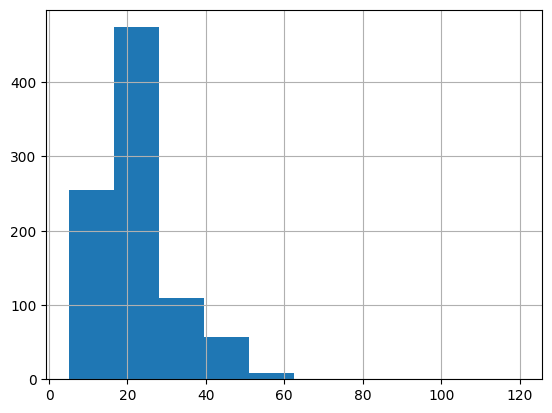

In [141]:
df['count'].hist()
plt.title("Number of Images Scraped per NYC Camera Feed")

## Test Saving An Image

In [ ]:
import urllib

In [ ]:
img_url = "https://webcams.nyctmc.org/api/cameras/eafc65f5-6ff9-4203-905f-3995b9fbc9eb/image?t=1693970292722"
img_filename = "sample_camera_output_urllib.jpg"
urllib.request.urlretrieve(img_url, img_filename)

In [ ]:
pwd

## Previewing Images

In [ ]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow, imread
import glob

In [ ]:
files = glob.glob("images/**/*.png")
print(len(files))
files[:10]

In [ ]:
imgs = []
for f in files[:10]:
    img = Image.open(f)#imread(f) #imread will read in as NumPy array instead...
    imgs.append(img)
print(len(imgs))
imshow(imgs[0])